## Support Vector Machine (SVM) from scratch 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [60]:
# Initialize X,y,w,b

X,y = make_blobs(n_samples = 100, centers=2, cluster_std=3.5, random_state=42) 
# n_samples = 100 training examples
# centers = 2 classes
# cluster_std = 3.5 standard deviation to add some randomness to the data
# random_State = to have same data

In [61]:
X.shape, y.shape

((100, 2), (100,))

In [62]:
X[:5], y[:5]

(array([[-4.18630746,  8.36447971],
        [ 8.43055819,  5.66147687],
        [-4.41453716,  9.40251519],
        [ 7.5170894 ,  8.61194512],
        [ 5.43598861,  6.54816932]]),
 array([0, 1, 0, 1, 1]))

In [63]:
y = y * 2. - 1
y[:10]


array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

In [64]:
np.random.seed(42)
w = np.random.rand(2,)
b = np.random.rand()
w,b

(array([0.37454012, 0.95071431]), 0.7319939418114051)

In [65]:
def predict_y(X,w,b):
	m = X.shape[0]
	y_preds = np.zeros(m)

	for i in range(m):
		y_preds[i] = np.dot(w,X[i]) + b
	
	y_preds = np.sign(y_preds)
	
	return y_preds

In [66]:
y_preds = predict_y(X,w,b)

In [67]:
y_preds[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
def plot_true_vs_preds(X,y,w,b):
	xlim = np.array([X[:,0].min()-1, X[:,0].max()+1])
	ylim = np.array([X[:,1].min()-1, X[:,1].max()+1])

	#y_true plot

	plt.figure(figsize=(4,5))
	plt.scatter(X[:,0], X[:,1], c=y)
	plt.title("y_true")
	plt.xlim(xlim[0], xlim[1])
	plt.ylim(ylim[0], ylim[1])

	#y_preds plot

	plt.figure(figsize=(4,5))
	plt.scatter(X[:,0], X[:,1], c=predict_y(X,w,b))
	plt.title("y_preds")
	plt.xlim(xlim[0], xlim[1])
	plt.ylim(ylim[0], ylim[1])

	# decision boundary and margin
	xx = xlim
	yyn = (-1-(b + (w[0]*xx)))/w[1] # lower margin used xx because would get 2 co-ordinates directly instead of one
	yym = (-b - (w[0]*xx))/w[1] # decision boundary
	yyp = (1-(b + (w[0]*xx)))/w[1] # upper margin

	plt.plot(xx,yyn,color="red",linestyle="dotted")
	plt.plot(xx,yym,color="black")
	plt.plot(xx,yyp,color="blue",linestyle="dotted")
	

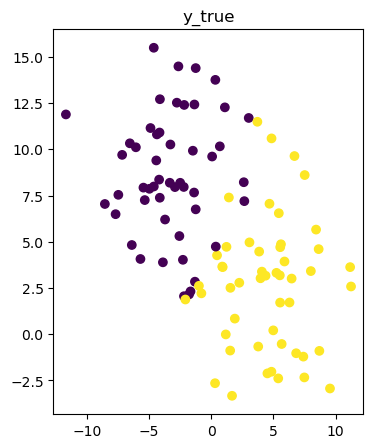

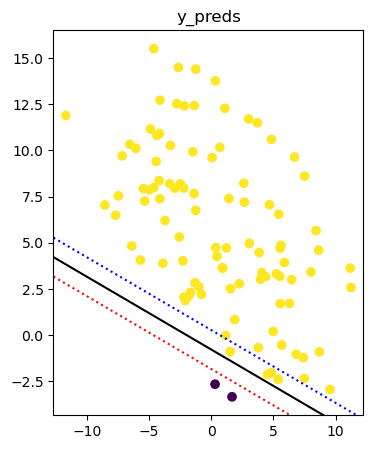

In [69]:
plot_true_vs_preds(X,y,w,b)

In [70]:
# Calculate hinge loss 
def hinge_loss(X_i, y_i, w, b):
	return max(0,1-y_i*(np.dot(w,X_i)+b))

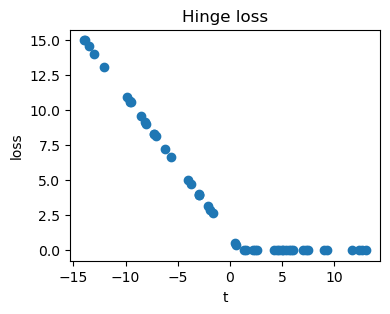

In [71]:
n_examples = 50
t = np.zeros(n_examples)
loss = np.zeros(n_examples)

for i in range(n_examples):
	t[i] = y[i] * (np.dot(w, X[i]) + b)
	loss[i] = hinge_loss(X[i], y[i], w, b)

plt.figure(figsize=(4,3))
plt.scatter(t, loss)
plt.title("Hinge loss")
plt.xlabel("t")
plt.ylabel("loss")
plt.show()



In [72]:
def calc_loss(X,y,w,b,c=1):
	m = X.shape[0]

	margin_cost = (np.dot(w,w)**2)/2	#|w|**2/2
	hinge_cost = 0

	for i in range(m):
		loss_i = hinge_loss(X[i], y[i], w, b)
		hinge_cost += loss_i
	
	hinge_cost *= c

	total_cost = margin_cost + hinge_cost

	return total_cost

In [73]:
calc_loss(X,y,w,b)

442.79701081354773

In [74]:
X.shape

(100, 2)

In [75]:
X.shape[0]

100

In [76]:

X.shape[1]

2

In [77]:
# Calculate gradient

def gradient(X,y,w,b,C=1):
	m = X.shape[0]
	n = X.shape[1]

	dj_dw = np.zeros(2)
	dj_db = 0
	

	for i in range(m):
		if y[i]*(np.dot(w,X[i]) + b) < 1:
			dj_dw -= (C*y[i]*X[i])
			dj_db -= (C*y[i])
		
	dj_dw += w

	return dj_dw, dj_db


In [78]:
dj_dw, dj_db = gradient(X,y,w,b)

In [79]:
dj_dw, dj_db

(array([-177.25171872,  443.32580276]), 44.0)

In [80]:
alpha = 0.001
w_new = w - alpha*dj_dw
b_new = b - alpha*dj_db

print(f"Before:{calc_loss(X,y,w,b)}")
print(f"After:{calc_loss(X,y,w_new,b_new)}")

Before:442.79701081354773
After:217.3486638430651


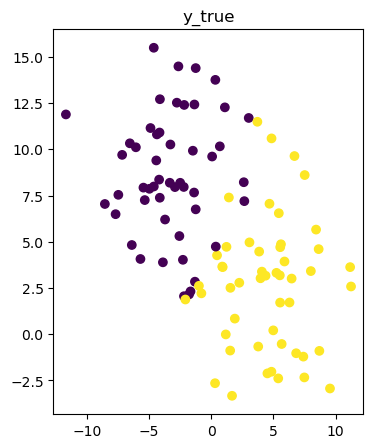

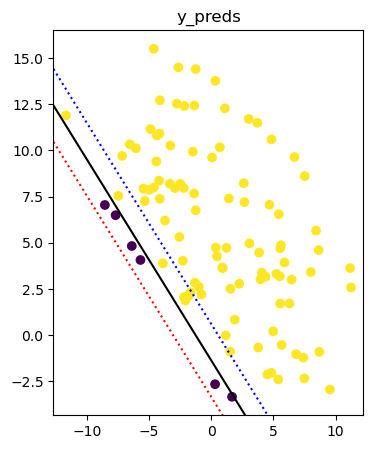

In [81]:
plot_true_vs_preds(X,y,w_new,b_new)

In [85]:
def gradient_descent(X,y,w,b,iter=1000,C=1,alpha=0.001,step=100):
	history = {}

	for i in range(iter):
		dj_dw, dj_db = gradient(X,y,w,b,C)

		w = w - alpha*dj_dw
		b = b - alpha*dj_db

		if i % step == 0:
			cost = calc_loss(X,y,w,b)
			print(f"Iter\t{i}\tCost\t{cost}")
			history[i] = cost

	
	return history, w, b

In [86]:
history, w_new, b_new = gradient_descent(X,y,w,b)

Iter	0	Cost	217.3486638430651
Iter	100	Cost	14.557816414370718
Iter	200	Cost	14.282185732594739
Iter	300	Cost	14.027063786483785
Iter	400	Cost	13.795150673884391
Iter	500	Cost	13.660520126639724
Iter	600	Cost	13.567521967684494
Iter	700	Cost	13.490917616889124
Iter	800	Cost	13.407136066198731
Iter	900	Cost	13.33838956957736
